# Pymaceuticals Inc.
---

### Analysis

Based on the trends observed in this data, one can draw the following conclusions regarding the performance of Capomulin, Pymaceuticals’ drug of interest, against other treatment regiments in the most recent animal study:

- Capomulin proved to be a relatively effective treatment in reducing tumor volumes in mice over the course of the treatment period. As exhibited in the box plot in the “Quartiles, Outliers and Boxplots” section of this report, the mice group which was administered Capomulin reported a lower median value for final tumor volumes as compared to the Infubinol and Ceftamin treatment groups.
- Larger mice in terms of weight were predisposed to larger tumor volumes over the course of treatment. The correlation between mouse weight and average tumor volume was determined to be 0.84, indicating a healthy positive strength of correlation. The strength of correlation is visually evident in the “Correlation and Regression” section of this report, which models a line of best fit over a scatter plot of the two variables. Ensuring random sampling between treatment groups will help mitigate any unintended influences introduced by mouse weight on average tumor volumes.
- Drug regimens Capomulin and Ramicane reported the highest number of observed mouse timepoints (see bar charts in Bar and Pie Charts section). Moreover, the treatment groups which were administered Capomulin and Ramicane also reported lower median values for final tumor volumes compared to the Infubinol and Ceftamin treatment groups. A higher number of observed mouse timepoints may be indicative of both the efficacy and longevity of treatment, implying improved performance outcomes over Infubinol and Ceftamin as treatments.

 

In [205]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [206]:
# Checking the number of mice.
mice_count = merge_df["Mouse ID"].nunique()
mice_count

249

In [207]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Use duplicated() function to identify duplicate mice ID in the data; this will provide a boolean Series, with a True value denoting a duplicate.
duplicate_mice = merge_df.duplicated()
duplicate_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [208]:
# Use sum() function to count the number of duplicate mice; True values are converted to 1, whereas False values are converted to 0.
# From the below sum, we can see that we have one duplicate mouse ID/row as there is only one True value.
duplicate_mice.sum()

1

In [209]:
# Use loc to identify the duplicate row/Mouse ID.
duplicate_mouse = merge_df.loc[merge_df.duplicated(), :]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [210]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merge_df.loc[(merge_df["Mouse ID"] == "g989"), :]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [211]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Use loc to filter and keep all Mice ID other than "g989."
clean_df = merge_df.loc[merge_df["Mouse ID"] != "g989", :]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [212]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_df["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [213]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_err_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                           "Median Tumor Volume": median_tumor,
                           "Tumor Volume Variance": variance_tumor,
                           "Tumor Volume Std. Dev.": std_dev_tumor,
                           "Tumor Volume Std. Err.": std_err_tumor})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [214]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

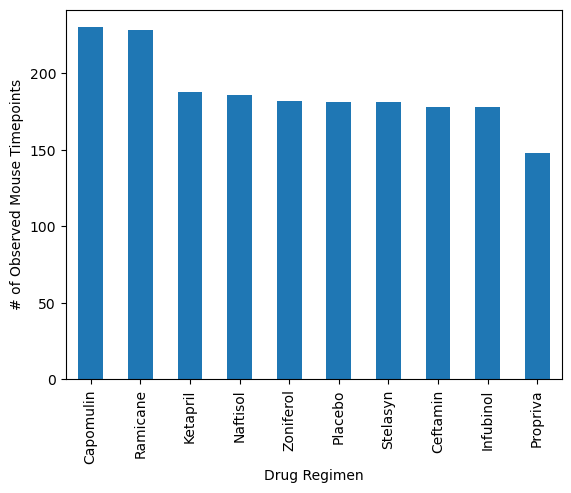

In [215]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_by_drug = clean_df.groupby("Drug Regimen")["Timepoint"].count()
sorted_total_rows_by_drug_df = pd.DataFrame(total_rows_by_drug.sort_values(ascending=False))

sorted_total_rows_by_drug_df.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", legend=False)

plt.show()

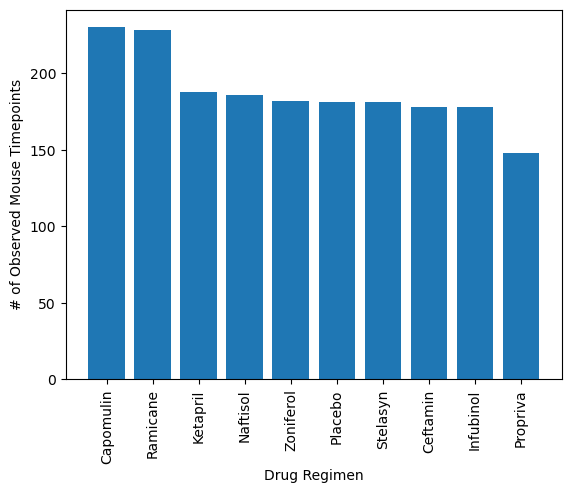

In [216]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
sorted_total_rows_by_drug = total_rows_by_drug.sort_values(ascending=False)

plt.bar(sorted_total_rows_by_drug.index, sorted_total_rows_by_drug, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

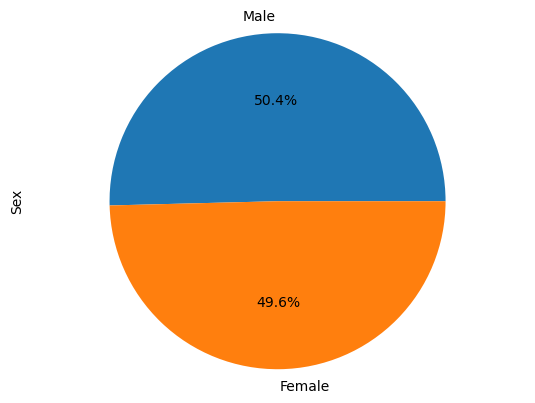

In [217]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

unique_mice_data = clean_df.loc[clean_df["Timepoint"] == 0, :]
unique_mice_sex = unique_mice_data.groupby("Sex")["Mouse ID"].count()
sort_unique_mice_sex = unique_mice_sex.sort_values(ascending=False)

male_vs_female = sort_unique_mice_sex.plot(kind="pie", y="Mouse ID", ylabel="Sex", autopct="%1.1f%%")
plt.axis("equal")

plt.show()

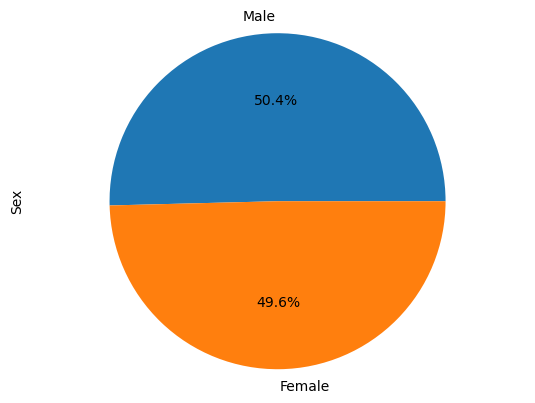

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_mice_count = (unique_mice_data["Sex"] == "Male").sum()
female_mice_count = (unique_mice_data["Sex"] == "Female").sum()

sex_distribution = [male_mice_count, female_mice_count]
labels = ["Male", "Female"]

plt.pie(sex_distribution, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [219]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max())
last_timepoint = last_timepoint.rename(columns={"Timepoint":"Last Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merge = pd.merge(clean_df, last_timepoint, on="Mouse ID")
new_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [220]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volumes = []

# Create empty list to fill with tumor vol data outliers found using if statement below.
volume_outliers = []

# Use for loop to successively filter DataFrame down to final tumor volumes for each Mouse ID for each Drug Regimen.
for treatment in treatments:
    only_treatment = new_merge.loc[new_merge["Drug Regimen"] == treatment]
    only_treatment_last_timepoint = only_treatment.loc[only_treatment["Timepoint"] == only_treatment["Last Timepoint"]]
# Once DataFrame has been filtered down to last timepoints for selected treatment, store tumor volumes associated with final timepoints in a variable and append to empty list.    
    last_timepoint_volume = only_treatment_last_timepoint["Tumor Volume (mm3)"]
    final_tumor_volumes.append(last_timepoint_volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = last_timepoint_volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_outlier_boundary = lowerq-(1.5*iqr)
    upper_outlier_boundary = upperq+(1.5*iqr)

# Use if statement to store outlier values for each treatment in an empty list and print statement if outlier values are identified.
    for value in last_timepoint_volume:
        if value <= lower_outlier_boundary or value >= upper_outlier_boundary:
            volume_outliers.append(value)
            print(f"{treatment}'s potential outliers: {volume_outliers}")

Infubinol's potential outliers: [36.3213458]


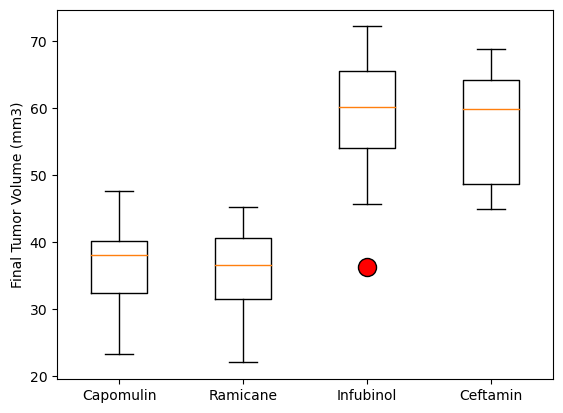

In [221]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(markerfacecolor="red", markersize=13)
plt.boxplot(final_tumor_volumes, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")

# Set x axis and tick locations; alternatively, we can also import NumPy and use the arange() function to generate an array of numbers to set as our x_axis.
x_axis = np.arange(1, len(treatments)+1)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatments)

plt.show()

## Line and Scatter Plots

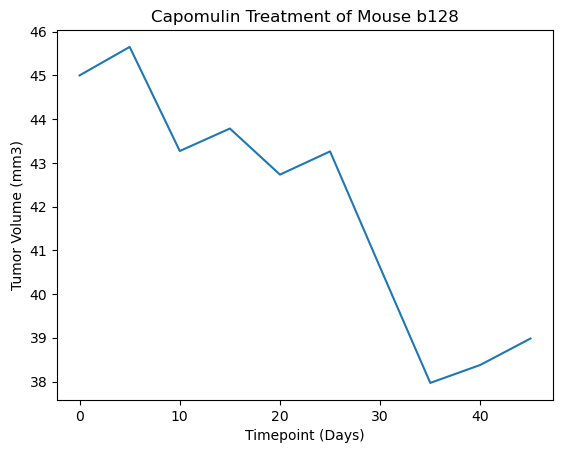

In [222]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_b128 = new_merge.loc[new_merge["Mouse ID"] == "b128"]

plt.plot(mouse_b128["Timepoint"], mouse_b128["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

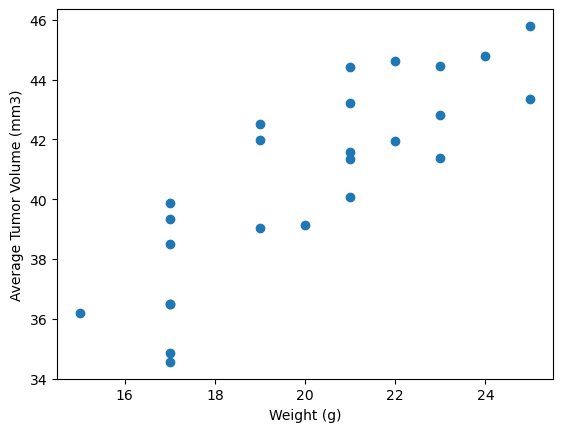

In [223]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter DataFrame to just rows associated with Capomulin regimen
just_capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

#Group by Mouse ID and determine average observed tumor volume for each mouse under Capomulin regimen
average_tumor_volume = just_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = just_capomulin.groupby("Mouse ID")["Weight (g)"].mean()

# Generate scatter plot
plt.scatter(weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


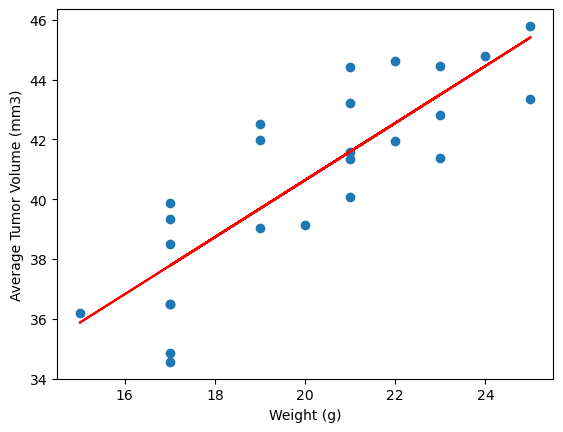

In [224]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate correlation coefficient
correlation_coefficient = round(st.pearsonr(weight, average_tumor_volume)[0],2)
print(f'The correlation between mouse weight and average tumor volume is {correlation_coefficient}')

# Calculate linear regression model and plot onto scatter plot
x = weight
y = average_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()